## Importing

In [2]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Loading Datasets

In [3]:
ds_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering.nc')
clusters_dr0 = ds_clusters.Clusters_Drivers

diatom_clusters = xr.open_dataset('/data/ibougoudis/MOAD/files/clustering_diatom.nc')
clusters_d0 = diatom_clusters.Clusters_Diatom

ds_variables = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')
diatom = ds_variables.Diatom

# Creating New Datasets

In [4]:
coords = dict(cluster=np.arange(0,6), time_counter=ds_clusters.time_counter) 

clusters_dr = xr.DataArray(coords=coords, dims = ['cluster', 'time_counter'])
clusters_d = xr.DataArray(coords=coords, dims = ['cluster', 'time_counter'])

for i in tqdm(coords.get('cluster')):
    
    clusters_dr[i]=diatom.where(clusters_dr0==i).mean(['x','y'])
    clusters_d[i]=diatom.where(clusters_d0==i).mean(['x','y'])


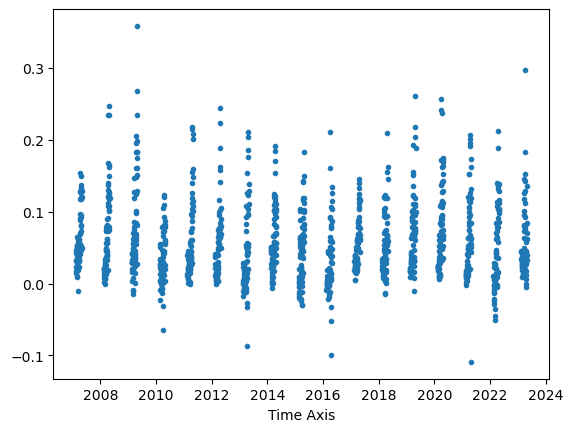

In [5]:
# Plotting the differences between the maximum diatom cluster for each day

(clusters_d.max('cluster') - clusters_dr.max('cluster')).plot( linestyle='', marker ='.')


  0%|          | 0/89 [00:00<?, ?it/s]

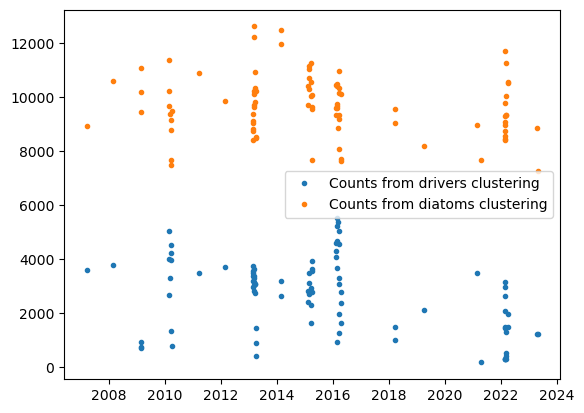

In [6]:
# Calculating the counts for all the days where the mean diatom was bigger for the clustering performed by the drivers

days = np.where(clusters_d.max('cluster') - clusters_dr.max('cluster') < 0)
days = list(days[0])

counts_dr = []
counts_d = []

for i in tqdm(days):    
    counts_dr.append(int(diatom[i].where(clusters_dr0[i] == clusters_dr[:,i].idxmax()).count().values))
    counts_d.append(int(diatom[i].where(clusters_d0[i] == clusters_d[:,i].idxmax().values).count().values))

fig, ax = plt.subplots()
ax.plot(diatom.time_counter[days], counts_dr, marker='.', linestyle='', label= 'Counts from drivers clustering')
ax.plot(diatom.time_counter[days], counts_d, marker='.', linestyle='', label= 'Counts from diatoms clustering')
ax.legend()


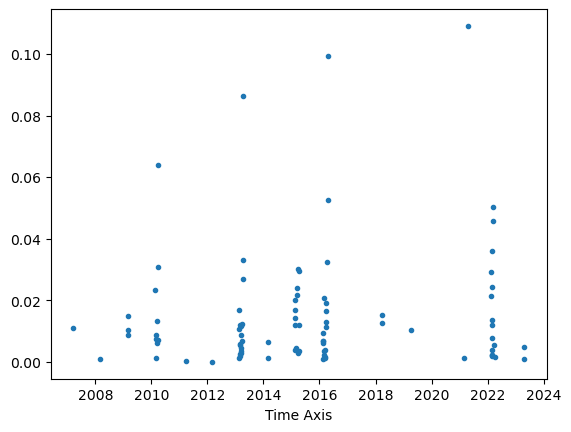

In [7]:
# Calculating the differences for these days

(clusters_dr[:,days].max('cluster') - clusters_d[:,days].max('cluster')).plot(marker='.', linestyle='')

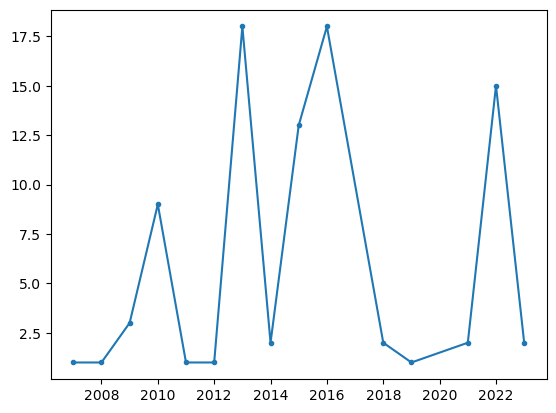

In [8]:
# Grouping by year

test = (clusters_dr[:,days].max('cluster') - clusters_d[:,days].max('cluster'))
test2=test.groupby(test.time_counter.dt.year)
plt.plot(np.unique(test.time_counter.dt.year),test2.count(), marker='.')

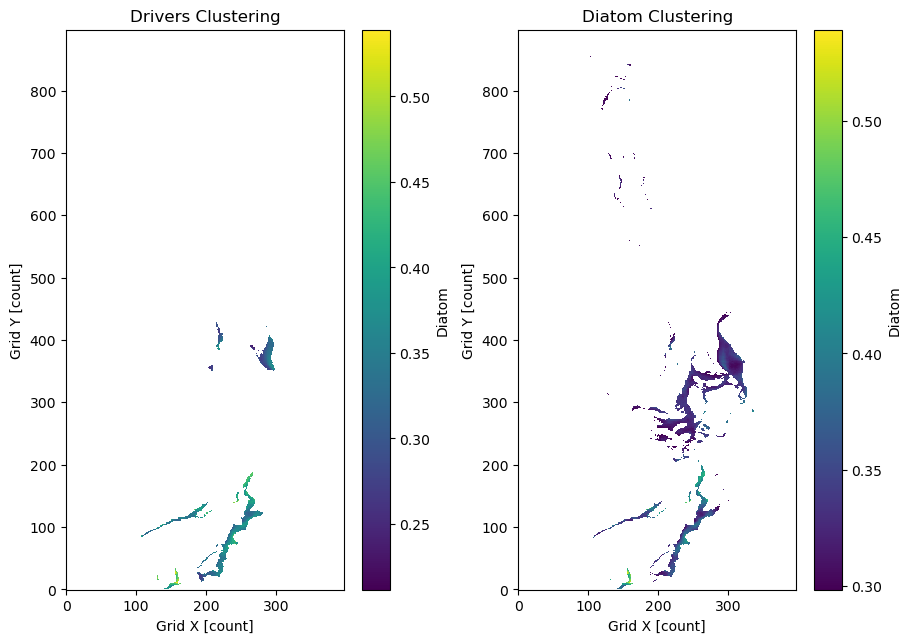

In [35]:
fig, ax = plt.subplots(1,2, figsize = (10,7))

plt.subplots_adjust(left=0.1,
    bottom=0.1, 
    right=0.9, 
    top=0.9, 
    wspace=0.3, 
    hspace=0.15)

diatom[days[0]].where(clusters_dr0[days[0]] == clusters_dr[:,days[0]].idxmax()).plot(ax = ax[0])
diatom[days[0]].where(clusters_d0[days[0]] == clusters_d[:,days[0]].idxmax()).plot(ax = ax[1])

ax[0].title.set_text('Drivers Clustering')
ax[1].title.set_text('Diatom Clustering')

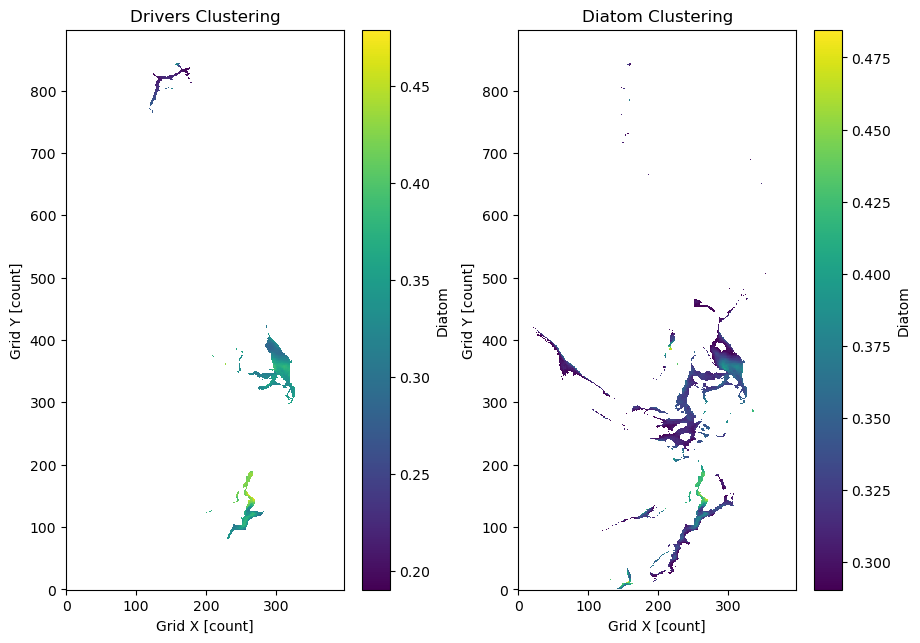

In [36]:
fig, ax = plt.subplots(1,2, figsize = (10,7))

plt.subplots_adjust(left=0.1,
    bottom=0.1, 
    right=0.9, 
    top=0.9, 
    wspace=0.3, 
    hspace=0.15)

diatom[days[1]].where(clusters_dr0[days[1]] == clusters_dr[:,days[1]].idxmax()).plot(ax = ax[0])
diatom[days[1]].where(clusters_d0[days[1]] == clusters_d[:,days[1]].idxmax()).plot(ax = ax[1])

ax[0].title.set_text('Drivers Clustering')
ax[1].title.set_text('Diatom Clustering')